In [1]:
from scipy import stats
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Uma distribuição normal - contínua

 - media - mean - loc
 - desvio padrão - scale

In [5]:
mu  = 2
sdv = 4
N   = 1000

samples = np.random.normal(loc=mu, scale=sdv, size=N)
len(samples), np.min(samples), np.max(samples), np.mean(samples), np.median(samples), np.std(samples)

(1000,
 -9.558014850530846,
 14.9260616774455,
 2.156629457517134,
 2.055398304301689,
 4.139637785440772)

### Média e Desvio Padrão Amostral calculados dos valores obtidos pela máquina randômica

In [6]:
muc = np.mean(samples)
sdvc = np.std(samples)

muc, sdvc

(2.156629457517134, 4.139637785440772)

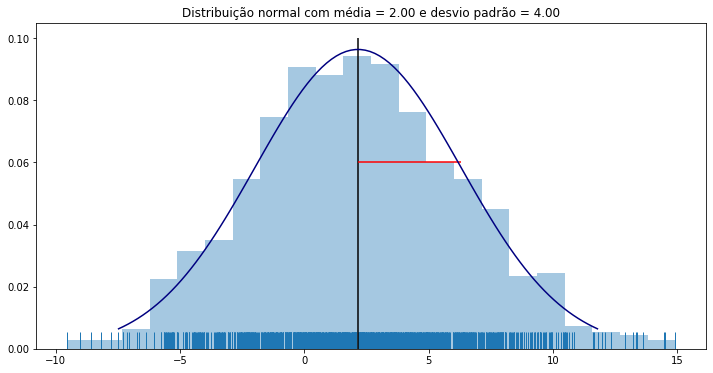

In [7]:
fig = plt.figure(figsize=(12, 6))

ax = sns.distplot(samples, kde=False, rug=True, norm_hist=True,);
plt.vlines(muc, 0, 0.1, color = 'black');
plt.hlines(0.06, muc, muc+sdvc, color = 'red');

#--- fitando a distribuição normal com muc e sdvc
#---                          Percent Point Function (PPF)
seqx = np.linspace(stats.norm.ppf(0.01, muc, sdvc), stats.norm.ppf(0.99, muc, sdvc), 100)
# qdo função continua: distribuiçao regida por probability density function (pdf)
sns.lineplot(seqx, stats.norm.pdf(seqx, muc, sdvc), color='navy')

title = 'Distribuição normal com média = %.2f e desvio padrão = %.2f'%(mu, sdv)
plt.title(title);

### O que é uma distribuição Z

uma distribuição Z é uma distribuição centrada em 0 e com desvio padrão = 1
ou seja é uma distribuição normalizada


<font size="5">Z = $\frac{x - <x>}{SSD}$</font>

esta distribuição está centrada no Zero (0) e com SSD = 1

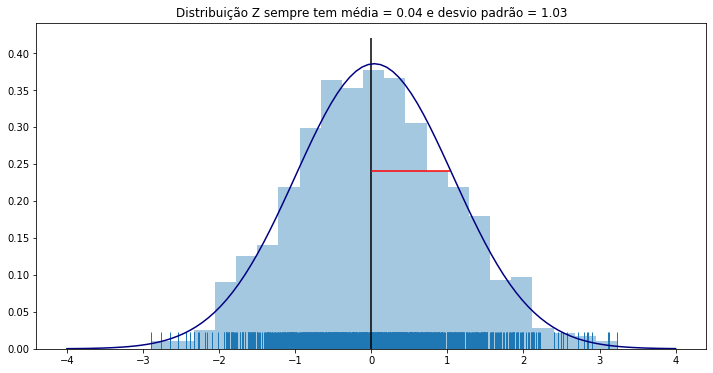

In [8]:
z = (samples-mu)/sdv

muZ = np.mean(z)  # = 0
sdvZ = np.std(z)  # = 1

fig = plt.figure(figsize=(12, 6))

ax = sns.distplot(z, kde=False, rug=True, norm_hist=True,);
plt.vlines(0, 0, 0.42, color = 'black');
plt.hlines(.24, 0, 0+sdvZ, color = 'red');

#--- fitando a distribuição normal com muc e sdvc
#---                          Percent Point Function (PPF)
# seqx = np.linspace(stats.norm.ppf(0.01, muZ, sdvZ), stats.norm.ppf(0.99, muZ, sdvZ), 100)
seqx = np.linspace(-4, 4, 100)
sns.lineplot(seqx, stats.norm.pdf(seqx, muZ, sdvZ), color='navy')

title = 'Distribuição Z sempre tem média = %.2f e desvio padrão = %.2f'%(muZ, sdvZ)
plt.title(title);

### Como se compara duas distribuições Z?

a primeira distribuição é a controle
dela obtemos a média e o desvio padrão

a segunda distribuição é o case
obetmos sua distribuição z dividindo seus valores amostrais pela media e desvio padrão do controle

3.1208673766995316


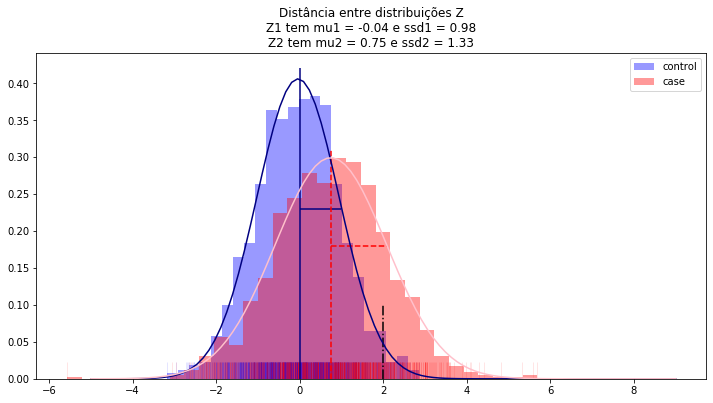

In [11]:
mu1 = 2; sdv1 = 1.5
mu2 = 3; sdv2 = 2.0
N   = 1000

samp1 = np.random.normal(loc=mu1, scale=sdv1, size=N)
samp2 = np.random.normal(loc=mu2, scale=sdv2, size=N)
print(np.mean(samp2))

z1 = (samp1-mu1)/sdv1
#-- z2 em relação aos parâmetros de z1 !!!
z2 = (samp2-mu1)/sdv1

muZ1 = np.mean(z1); sdvZ1 = np.std(z1)
muZ2 = np.mean(z2); sdvZ2 = np.std(z2)

muc1 = np.mean(z1); sdvc1 = np.std(z1)
muc2 = np.mean(z2); sdvc2 = np.std(z2)

fig = plt.figure(figsize=(12, 6))

ax  = sns.distplot(z1, kde=False, rug=True, norm_hist=True, color='blue', label='control', rug_kws={"color": 'blue', "alpha": .1,})
ret = sns.distplot(z2, kde=False, rug=True, norm_hist=True, color='red',  label='case'   , rug_kws={"color": 'red',  "alpha": .1,}, ax=ax)

plt.vlines(  0, 0, 0.42,    color = 'navy')
plt.hlines(.23, 0, 0+sdvZ1, color = 'navy');

plt.vlines(  muc2, 0, 0.31, color = 'red', linestyle='--')
plt.hlines(.18, muc2, muc2+sdvZ2, color = 'red', linestyle='--')

plt.vlines(2, 0, 0.1, color = 'black', linestyle='-.')

#--- fitando a distribuição normal com muc e sdvc
#---                          Percent Point Function (PPF)
# seqx = np.linspace(mu1-4*sdv1, mu2+4*sdv2, 100)
seqx = np.linspace(-5, 9, 100)
sns.lineplot(seqx, stats.norm.pdf(seqx, muZ1, sdvZ1), color='navy')
sns.lineplot(seqx, stats.norm.pdf(seqx, muZ2, sdvZ2), color='pink')

title = 'Distância entre distribuições Z'
title += '\nZ1 tem mu1 = %.2f e ssd1 = %.2f'%(muc1, sdvc1)
title += '\nZ2 tem mu2 = %.2f e ssd2 = %.2f'%(muc2, sdvc2)
plt.title(title)
plt.legend();

### Pontos em Z2 além de 2 SSD == 2

In [12]:
z2_sig = z2[z2 > 2]
len(z2_sig), z2_sig[:10]

(168,
 array([2.6103834 , 2.74309985, 2.57354056, 2.83005276, 2.48071717,
        2.24987311, 2.47861508, 4.82640749, 2.73388009, 2.5098582 ]))

In [13]:
z2_inf = z2[z2 < -2]
len(z2_inf), z2_inf[:10]

(22,
 array([-2.23315535, -2.97109855, -2.63353201, -2.03531228, -2.04281572,
        -2.04645446, -3.05738807, -2.21113633, -2.38883659, -2.16432197]))

### Distância entre distribuições - preparação para o teste-t

In [14]:
mus = [1, 3]
sds = [0.3, 0.8]
N = 1000

samp1 = np.random.normal(mus[0], sds[0], N)
samp2 = np.random.normal(mus[1], sds[1], N)

df = pd.DataFrame([samp1, samp2]).T
df.columns=['dist1', 'dist2']
df.head(3)

,dist1,dist2
0,1.180979,2.752083
1,1.114128,2.404162
2,1.127234,3.649881


### Duas distribuições sobrepostas

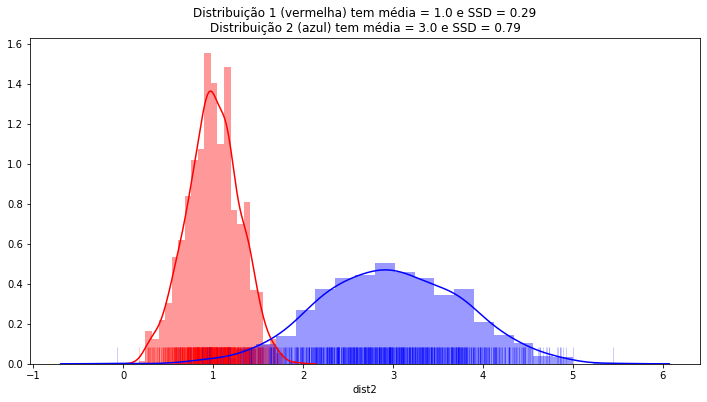

In [15]:
colors = ['red', 'blue']
fig = plt.figure(figsize=(12, 6))

for i in range(2):
    sns.distplot(df['dist%d'%(i+1)], color=colors[i], hist=True, kde=True, rug=True,
                rug_kws={"color": colors[i], "alpha": .2,})

mu1 = df.dist1.mean()
sd1 = df.dist1.std()

mu2 = df.dist2.mean()
sd2 = df.dist2.std()

    
title  =   "Distribuição 1 (vermelha) tem média = %.1f e SSD = %.2f"%(mu1, sd1)
title += "\nDistribuição 2 (azul) tem média = %.1f e SSD = %.2f"%(mu2, sd2)
plt.title(title);

### O que é teste de hipótese?

Nas diversas áreas do conhecimento da Economia ao Marketing, da Sociologia à Biologia Molecular, sempre se deseja comparar 2 ou mais grupos. 

Usualmente, se deseja comparar um grupo controle versus um grupo 'alterado'. Por exemplo, convocamos 60 pacientes diabéticos, 30 mulheres e 30 homens, não medicados. Obtemos a média glicêmica 2 horas após o café da manhã controlado, por exemplo. Dois dias após o primeiro teste de glicemia, medicamos 50% dos pacientes e oferecemos placebo para os outros 50% dos pacientes (um produto inerte). Denominamos de Teste Duplo Cego caso quem administre o medicamento (ou placebo) não saiba o que está administrando, e caso os pacientes também não saibam. 
https://en.wikipedia.org/wiki/Blinded_experiment

Após 5 dias, p.ex., refazemos o teste de glicemia, e o que podemos comparar?
  - Placebo x Medicado 
  - Placebo x Controle
  - Medicado x Controle
  - Homens x Mulheres

Porém, o que realmente queremos saber? 
  - **Será que o medicamento fez efeito?**
  
Para responder esta pergunta o ideal é:
  - Fazer a diferença entre as médias de dois grupos (medicados x controle, p.ex.)
  - Hipótese 1: a diferença fica próxima a zero 
    - Neste caso as distribuições devem ser parecidas, mas temoso que analisar o desvio padrão final!
  - Hipótese 2: a diferença se afasta de zero:
    - Mas, o quanto?
      - Se muito - as distribuições devem ser diferentes
      - Se pouco - as distribuições devem ser similares, depende do SSD
  - Portanto, precisamos quantificar:
    - muito e pouco
      - Para isto Gosset criou o teste-t "de student" (student era seu codnome, pois ele trabalhava numa cervejaria na Irlanda e não podia publicar um paper trabalhando lá!)
      - Logo, o teste-t aleḿ de levar em conta a diferença entre as médias, deve achar uma métrica do quanto acreditamos que diferença se afasta do zero!
      - A esta métrica denominamos Intervalo de Confiança (IC).
      
Portanto, o teste t tem que levar em conta:
  - A diferença da média das distribuições - media(X2) - media(X1)
  - O desvio padrão
  - E definir uma métrica para saber o quanto estamos longe do zero.
  
Por fim, precisamos criar um novo parâmetro matemático, o Desvio Padrão das Médias, e entender no decorrer do desenvolvimento o que ele significa:
  - O teste-t depende:
    - Da diferença entre as médias
    - Relativas ao desvio padrão amostral
    - E ele deve funcionar desde números amostrais (n) grandes até pequenos
    - Além disto, as distribuições devem ser distribuições normais.
    - Caso o n << 30, fica difícil de afirmar que uma distribuição é ou não normal
    - Porém, caso seja uma medida pontual, repetida várias vezes, podemos afirmar que esta deve ser normal.
    
Importante (não demonstraremos aqui)
  - Uma medida pontual, tomada repetidamente, tende a uma distribuição normal:
    - ora erramos para mais, ora erramos para menos
    - ora ao fazermos várias medidas, ora observamos valores maiores e ora menores
    - a medida que o número amostra cresce: TEMOS MAIS CERTEZA DO VALOR MÉDIO REAL
    
  - O importante é que esta média pode ser amostrada de qualquer distribuição
    - discreta: como binomial, csi-quadrado ou Poisson
    - contínua: como normal, beta, gamma, etc
    
Ou seja se quemos aferir que numa dada avenida há em média 3.5 acidentes por mês (distribuição de Poisson), é só medirmos quantos acidentes tem durante 10 meses seguidos, p.ex., e a média tenderá à distribuição normal, independente que a distribuição de acidentes no mês seja poissonica.

Isto ficou comprovado com o Teorema Central do Limite.
https://en.wikipedia.org/wiki/Central_limit_theorem

O Teorema central do limite (ou "teorema do limite central") é um importante resultado da estatística ... em teoria das probabilidades, esse teorema afirma que quando o tamanho da amostra aumenta, a distribuição amostral da sua média aproxima-se cada vez mais de uma distribuição normal. Este resultado é fundamental na teoria da inferência estatística.[1] -> copiado de https://pt.wikipedia.org/wiki/Teorema_central_do_limite

### Voltando ao teste de hipótese

   Teste de Hipótese surge de forma a podermos fazer inferências. Algo é maior que o controle? Os meses de verão são mais úmidos que os de inverno no SE do Brasil? Para tanto, como observamos acima, precisamos de duas hipóteses:
   
   - sim a distribuição 1 é similar    à dois: Hipótese Nula        ou H0
   - não a distribuição 1 é diferente da dois: Hipótese Alternativa ou Ha
   
https://en.wikipedia.org/wiki/Statistical_hypothesis_testing

Lembre-se do problema de encontrarmos pessoas muito altas, numa cidade, ou muito baixas. A distribuição de alturas é regida pela distribuição normal, e as bordas da distribuição espelham, para menos os baixos e para mais os altos. Se ordenarmos os indivíduos por altura, e selecionamos os 2.5% de indivíduos iniciais à esquerda teremos os de baixa estatura, e ao selecionarmos os 2.5% de indivídulos finais à direita teremos os muito altos. 

O conceito de 2.5% á esquerda e 2.5% à direita é um limiar (threshold) adotado numa distribuição bi-caudal.
Numa distribuição onde somente queremos efeitos para à direita (maior que a média) ou para à esquerda (menor que a média) tomamos o valor de limiar de 5%, para uma distribuição mono-caudal.

In [16]:
mu1  = 172
sdv1 = 12
N   = 1000

samp1 = np.random.normal(loc=mu1, scale=sdv1, size=N)
muc1 = np.mean(samp1); sdvc1 = np.std(samp1)

perc25_inf = stats.norm.ppf(0.025, mu1, sdv1)
perc25_sup = stats.norm.ppf(0.975, mu1, sdv1)

muc1, sdvc1, perc25_inf, perc25_sup

(172.11377955380027,
 11.902470301559402,
 148.48043218551936,
 195.51956781448064)

In [17]:
print("Indívíduos abaixo de %.1f cm são muito baixos"%(perc25_inf))
print("Indívíduos acima  de %.1f cm são muito altos"%(perc25_sup))

Indívíduos abaixo de 148.5 cm são muito baixos
Indívíduos acima  de 195.5 cm são muito altos


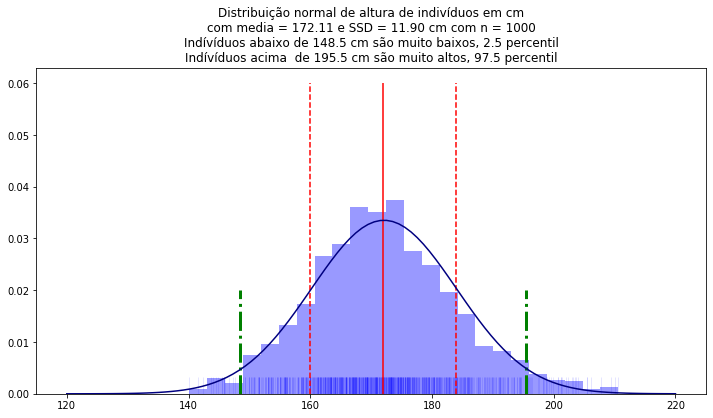

In [18]:
fig = plt.figure(figsize=(12, 6))

ax  = sns.distplot(samp1, kde=False, rug=True, norm_hist=True, color='blue', rug_kws={"color": 'blue', "alpha": .1,})
plt.vlines(mu1, 0, 0.06,    color = 'red')
plt.vlines(mu1+sdv1, 0, 0.06, color = 'red', linestyle='--')
plt.vlines(mu1-sdv1, 0, 0.06, color = 'red', linestyle='--')

plt.vlines(perc25_inf, 0, 0.02, color = 'green', linestyle='-.', linewidth=3)
plt.vlines(perc25_sup, 0, 0.02, color = 'green', linestyle='-.', linewidth=3)


#--- fitando a distribuição normal com muc e sdvc
#---                          Percent Point Function (PPF)
# seqx = np.linspace(mu1-4*sdv1, mu2+4*sdv2, 100)
seqx = np.linspace(120, 220, 100)
sns.lineplot(seqx, stats.norm.pdf(seqx, muc1, sdvc1), color='navy')

title = 'Distribuição normal de altura de indivíduos em cm'
title += '\ncom media = %.2f e SSD = %.2f cm com n = %d'%(muc1, sdvc1, N)
title += "\nIndívíduos abaixo de %.1f cm são muito baixos, 2.5 percentil"%(perc25_inf)
title += "\nIndívíduos acima  de %.1f cm são muito altos, %.1f percentil"%(perc25_sup, (1-0.025)*100)
plt.title(title);

### Teste t

statistician William Sealy Gosset 

<font size="6">t-stat = $\frac{<X>-\mu}{\frac{SSD}{\sqrt(n)}}$</font>

de forma mais generalizada dadas duas distribuições X1 e X2

<font size="6">t-stat = $\frac{<X1>-<X2>}{\sqrt( \frac{var1}{n1} + \frac{var2}{n2}) }$</font>

In [20]:
df.head(2)

,dist1,dist2
0,1.180979,2.752083
1,1.114128,2.404162


### Distribuição t-student

In [19]:
from scipy.stats import t

#-- degree of freedom - graus de liberdade
#-- se faço um experimnto N = 3 ... degree of freedom = N-1
degfree = 3
mean, var, skew, kurt = t.stats(degfree, moments='mvsk')
mean, var, skew, kurt

(array(0.), array(3.), array(nan), array(inf))

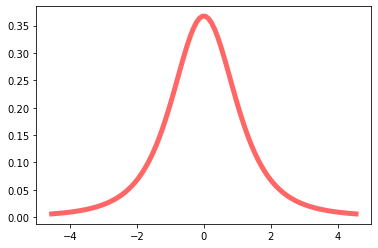

In [23]:
x = np.linspace(t.ppf(0.01, degfree), t.ppf(0.99, degfree), 100)
plt.plot(x, t.pdf(x, degfree), 'r-', lw=5, alpha=0.6, label='t pdf');

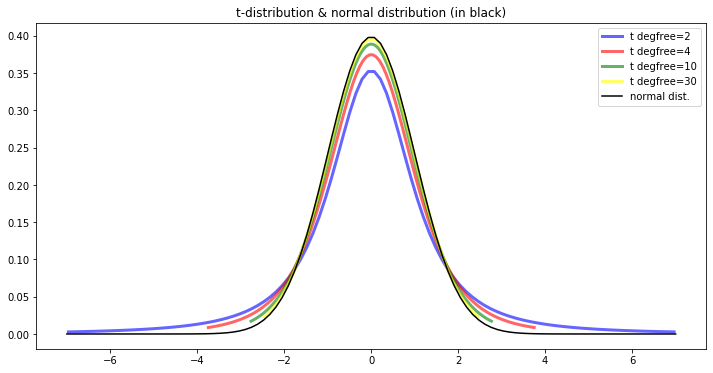

In [24]:
colors = ['blue', 'red', 'green', 'yellow']
degfrees = [2, 4, 10, 30]

plt.figure(figsize=(12,6))
for i in range(4):
    color = colors[i]
    degfree    = degfrees[i]
    
    x = np.linspace(t.ppf(0.01, degfree), t.ppf(0.99, degfree), 100)
    plt.plot(x, t.pdf(x, degfree), '-', lw=3, alpha=0.6, label='t degfree=%d'%degfree, color=color);

seqx = np.linspace(-7, 7, 100)
plt.plot(seqx, stats.norm.pdf(seqx, 0, 1), color='black', label='normal dist.')
plt.title("t-distribution & normal distribution (in black)")
plt.legend();

### Coeficiente de variação

<font size="5">$CV = \frac{SD}{media}$</font>

### Tamanho do efeito (effect size)

<font size="5">$\theta = \frac{media_1 - media_2}{SD}$</font>

https://en.wikipedia.org/wiki/Effect_size


### Distância não padronizada

<font size="5">$diff = media_1 - media_2$</font>


### Markdown

https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/ 
    
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html
    

### Criando o eixo x

In [25]:
seqxs = []
seqx1 = np.linspace(stats.norm.ppf(0.01, mus[0], sds[0]), stats.norm.ppf(0.99, mus[0], sds[0]), 100)
seqxs.append(seqx1)
seqx1[:5], seqx1[-10:-1]

(array([0.30209564, 0.31619472, 0.33029379, 0.34439287, 0.35849195]),
 array([1.57101266, 1.58511174, 1.59921082, 1.61330989, 1.62740897,
        1.64150805, 1.65560713, 1.66970621, 1.68380528]))

In [26]:
seqx2 = np.linspace(stats.norm.ppf(0.01, mus[1], sds[1]), stats.norm.ppf(0.99, mus[1], sds[1]), 100)
seqxs.append(seqx2)
seqx2[:5], seqx2[-10:-1]

(array([1.1389217 , 1.17651924, 1.21411678, 1.25171432, 1.28931187]),
 array([4.52270043, 4.56029797, 4.59789551, 4.63549305, 4.67309059,
        4.71068813, 4.74828568, 4.78588322, 4.82348076]))

### Fazendo um stack para o barplot

In [27]:
mus = [1, 3]
sds = [0.3, 0.8]
N = 1000

samp1 = np.random.normal(mus[0], sds[0], N)
samp2 = np.random.normal(mus[1], sds[1], N)

df = pd.DataFrame([samp1, samp2]).T
df.columns=['dist1', 'dist2']
df.head(3)

,dist1,dist2
0,0.794569,3.257022
1,0.909485,1.718554
2,1.485954,2.924555


In [28]:
df2 = pd.DataFrame(df.dist1)
df2['class'] = 'um'
df2.columns = ['val', 'class']

dfa = pd.DataFrame(df.dist2)
dfa['class'] = 'dois'
dfa.columns = ['val', 'class']

# df2 = pd.concat([df2, dfa])
df2 = df2.append(dfa)
df2.tail(3)

,val,class
997,3.113743,dois
998,3.812705,dois
999,3.098335,dois


### t-test

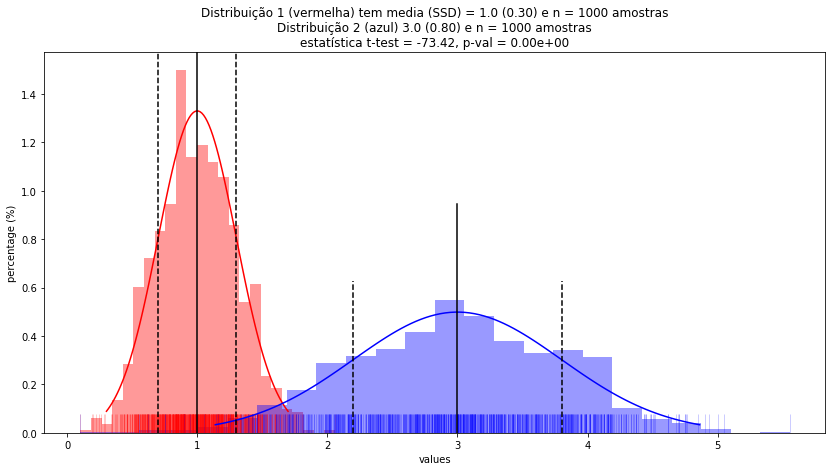

In [30]:
colors = ['red', 'blue']
fig = plt.figure(figsize=(14, 7))

for i in range(2):
    sns.distplot(df['dist%d'%(i+1)], color=colors[i], kde=False, rug=True, norm_hist=True,
                rug_kws={"color": colors[i], "alpha": .2,})
    
    sns.lineplot(seqxs[i], stats.norm.pdf(seqxs[i], mus[i], sds[i]), color=colors[i])

mu1 = df.dist1.mean(); sd1 = df.dist1.std()
mu2 = df.dist2.mean(); sd2 = df.dist2.std()

plt.axvline(x=mus[0], ymin=0, ymax=1.4, color='black')
plt.axvline(x=mus[0]+sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')
plt.axvline(x=mus[0]-sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')

plt.axvline(x=mus[1], ymin=0, ymax=.6, color='black')
plt.axvline(x=mus[1]+sds[1], ymin=0, ymax=.4, color='black', linestyle='--')
plt.axvline(x=mus[1]-sds[1], ymin=0, ymax=.4, color='black', linestyle='--')

# nsamp = N*sqrt(sds[0]**2/n**2 + sds[1]**2/n**2)
SSD     = np.sqrt(sds[0]**2 + sds[1]**2)
EffSize = (mus[1] - mus[0]) / SSD

diff  = mus[1]-mus[0]
xdiff = mus[1] - (diff/2)

sta, pval = stats.ttest_ind(df.dist1, df.dist2)
text_stat = "estatística t-test = %.2f, p-val = %.2e"%(sta, pval)
    
plt.xlabel("values")
plt.ylabel("percentage (%)")
     
title  =   "Distribuição 1 (vermelha) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu1, sd1, N)
title += "\nDistribuição 2 (azul) %.1f (%.2f) e n = %d amostras"%(mu2, sd2, N)
title += '\n' + text_stat
plt.title(title);

### Revendo o gráfico com todas as estatísticas

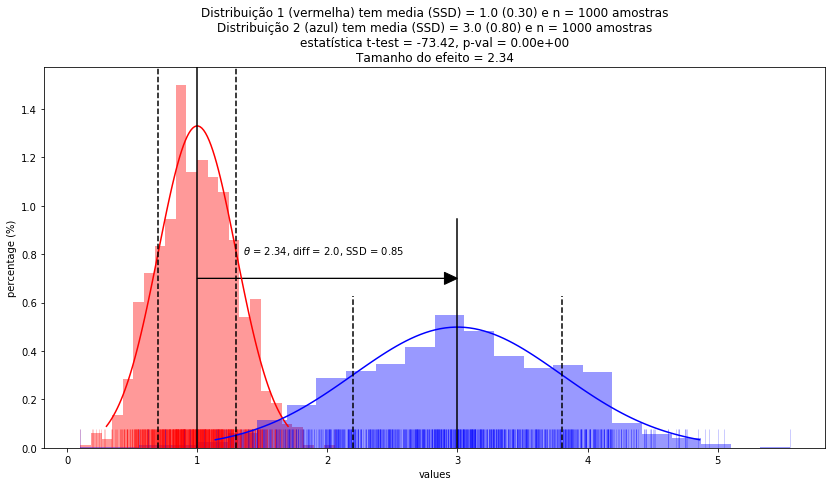

In [31]:
colors = ['red', 'blue']
fig = plt.figure(figsize=(14, 7))

for i in range(2):
    sns.distplot(df['dist%d'%(i+1)], color=colors[i], kde=False, rug=True, norm_hist=True,
                rug_kws={"color": colors[i], "alpha": .2,})
    
    sns.lineplot(seqxs[i], stats.norm.pdf(seqxs[i], mus[i], sds[i]), color=colors[i])

mu1 = df.dist1.mean()
sd1 = df.dist1.std()

mu2 = df.dist2.mean()
sd2 = df.dist2.std()

plt.axvline(x=mus[0], ymin=0, ymax=1.4, color='black')
plt.axvline(x=mus[0]+sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')
plt.axvline(x=mus[0]-sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')

plt.axvline(x=mus[1], ymin=0, ymax=.6, color='black')
plt.axvline(x=mus[1]+sds[1], ymin=0, ymax=.4, color='black', linestyle='--')
plt.axvline(x=mus[1]-sds[1], ymin=0, ymax=.4, color='black', linestyle='--')

head_width = 0.05

# nsamp = N*sqrt(sds[0]**2/n**2 + sds[1]**2/n**2)
SSD = np.sqrt(sds[0]**2 + sds[1]**2)
EffSize = (mus[1] - mus[0]) / SSD

diff = mus[1]-mus[0]
xdiff = mus[1] - (diff/2)
yarrow = 0.7

sta, pval = stats.ttest_ind(df.dist1, df.dist2)
#text_stat = "t-test statistics = %.2f, p-val = %.2e"%(sta, pval)
text_stat = "estatística t-test = %.2f, p-val = %.2e"%(sta, pval)
    
plt.arrow(mus[0], yarrow, (diff-2*head_width), 0, head_width=head_width, head_length=0.1, fc='k', ec='k')

text = '$\\theta$ = %.2f, diff = %.1f, SSD = %.2f'%(EffSize, diff, SSD)
plt.text(x=(xdiff-.65), y=(yarrow+.1), s=text)
plt.xlabel("values")
plt.ylabel("percentage (%)")
     
title  =   "Distribuição 1 (vermelha) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu1, sd1, N)
title += "\nDistribuição 2 (azul) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu2, sd2, N)
title += '\n' + text_stat + '\nTamanho do efeito = %.2f'%(EffSize)
plt.title(title);

### Barplot/Violinplot invertido

In [32]:
df2.head(3)

,val,class
0,0.794569,um
1,0.909485,um
2,1.485954,um


In [33]:
df2.tail(3)

,val,class
997,3.113743,dois
998,3.812705,dois
999,3.098335,dois


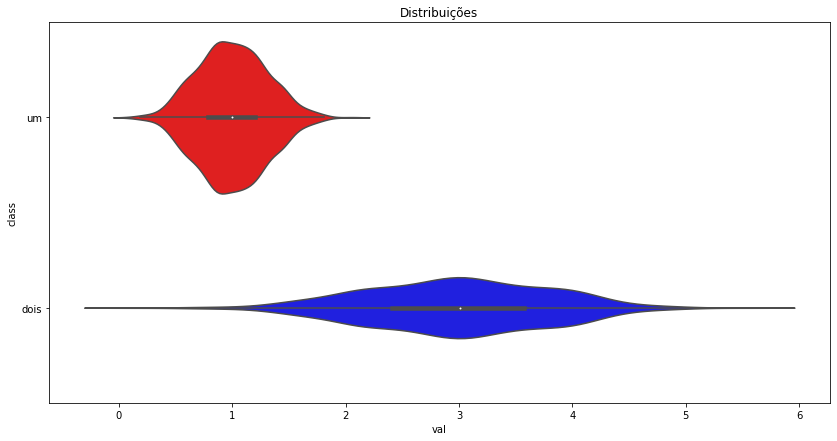

In [34]:
fig = plt.figure(figsize=(14, 7))
#sns.set(rc={"figure.figsize": (6,4)})
sns.violinplot(x="val", y="class", data=df2, palette=['red', 'blue']) # , saturation=.05)
plt.title("Distribuições");

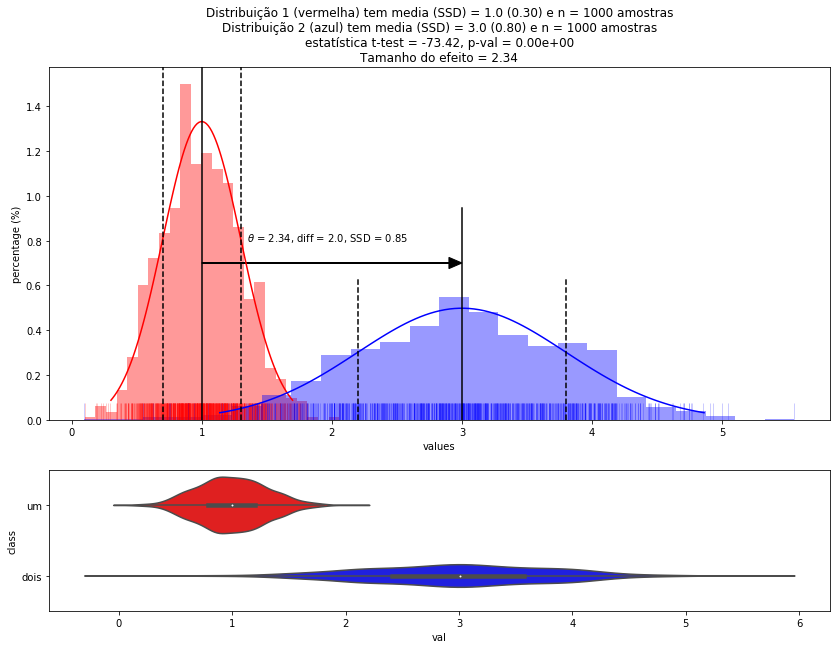

In [35]:
from matplotlib import gridspec

# f, axes = plt.subplots(2, 1, figsize=(14, 16), sharex=True)

colors = ['red', 'blue']
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 2])

axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1]))

mu1 = df.dist1.mean()
sd1 = df.dist1.std()

mu2 = df.dist2.mean()
sd2 = df.dist2.std()

for i in range(2):
    sns.distplot(df['dist%d'%(i+1)], color=colors[i], kde=False, rug=True, norm_hist=True,
                rug_kws={"color": colors[i], "alpha": .2,}, ax=axes[0])
    
    sns.lineplot(seqxs[i], stats.norm.pdf(seqxs[i], mus[i], sds[i]), color=colors[i], ax=axes[0])



axes[0].axvline(x=mus[0], ymin=0, ymax=1.4, color='black')
axes[0].axvline(x=mus[0]+sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')
axes[0].axvline(x=mus[0]-sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')

axes[0].axvline(x=mus[1], ymin=0, ymax=.6, color='black')
axes[0].axvline(x=mus[1]+sds[1], ymin=0, ymax=.4, color='black', linestyle='--')
axes[0].axvline(x=mus[1]-sds[1], ymin=0, ymax=.4, color='black', linestyle='--')

head_width = 0.05

# nsamp = N*sqrt(sds[0]**2/n**2 + sds[1]**2/n**2)
SSD = np.sqrt(sds[0]**2 + sds[1]**2)
EffSize = (mus[1] - mus[0]) / SSD

diff = mus[1]-mus[0]
xdiff = mus[1] - (diff/2)
yarrow = 0.7

axes[0].arrow(mus[0], yarrow, (diff-2*head_width), 0, head_width=head_width, head_length=0.1, fc='k', ec='k')

text = '$\\theta$ = %.2f, diff = %.1f, SSD = %.2f'%(EffSize, diff, SSD)
axes[0].text(x=(xdiff-.65), y=(yarrow+.1), s=text)
axes[0].set_xlabel("values")
axes[0].set_ylabel("percentage (%)")
     
title  =   "Distribuição 1 (vermelha) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu1, sd1, N)
title += "\nDistribuição 2 (azul) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu2, sd2, N)
title += '\n' + text_stat + '\nTamanho do efeito = %.2f'%(EffSize)
axes[0].set_title(title);

df2 = pd.DataFrame(df.dist1)
df2['class'] = 'um'
df2.columns = ['val', 'class']

dfa = pd.DataFrame(df.dist2)
dfa['class'] = 'dois'
dfa.columns = ['val', 'class']

# df2 = pd.concat([df2, dfa])
df2 = df2.append(dfa)

sns.violinplot(x="val", y="class", data=df2, palette=['red', 'blue'], ax=axes[1]); # , saturation=.05)

### Vamos 'encapsular' tudo numa função em python denominada plot_2_distributions()

In [36]:
from scipy.stats import norm

def plot_2_distributions(mus, sds, N, xlim, alpha=0.05):
    # criando as distribuições normais
    j0 = np.random.normal(mus[0], sds[0], N)
    j1 = np.random.normal(mus[1], sds[1], N)

    # transformando duas lista em um Dataframe pandas
    df = pd.DataFrame([j0, j1]).T
    df.columns=['dist1', 'dist2']

    # definindo cores e o tamanho da figura
    colors = ['red', 'blue']
    fig = plt.figure(figsize=(14, 7))
    # como vai ter duas figuras, definindo a proporção de alturas entre as figuras
    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 2]) 

    # definindo os eixos da figura (ax.fig())
    axes = []
    axes.append(plt.subplot(gs[0]))
    axes.append(plt.subplot(gs[1]))


    for i in range(2):
        # cada distplot (histograma) em seaborn em um axis ax
        # repare que norm_hist=True --> então o histograma é normalizado = distribuição
        sns.distplot(df['dist%d'%(i+1)], color=colors[i], kde=False, rug=True, norm_hist=True,
                    rug_kws={"color": colors[i], "alpha": .2,}, ax=axes[0])
        # plote a distribuição normal - fitting
        sns.lineplot(seqxs[i], stats.norm.pdf(seqxs[i], mus[i], sds[i]), color=colors[i], ax=axes[0])

        
    #----------- statistics --------------------
    #-- ttest - como as duas distribuições são normais
    #--         será que elas são diferentes?
    sta, pval = stats.ttest_ind(df.dist1, df.dist2)
    #text_stat = "t-test statistics = %.2f, p-val = %.2e"%(sta, pval)
    text_stat = "estatística t-test = %.2f, p-val = %.2e"%(sta, pval)

    if pval < alpha:
        # text_stat = 'Statiscally distinct, H0 must be refuted ' + text_stat
        text_stat = 'Distribuições estatiscamente diferentes, H0 precisa ser refutado\n' + text_stat
    else:
        #text_stat = 'Statiscally similar, H0 must be accepetd ' + text_stat
        text_stat = 'Distribuições estatiscamente similar, H0 precisa ser aceito\n' + text_stat
    
    #-- recalcule os parâmetros simulados
    mu0c = df.dist1.mean()
    sd0c = df.dist1.std()

    mu1c = df.dist2.mean()
    sd1c = df.dist2.std()

    # plot linhas verticais de médias e 1 desvio padrão para esquerda e direita
    axes[0].axvline(x=mus[0], ymin=0, ymax=1.4, color='black')
    axes[0].axvline(x=mus[0]+sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')
    axes[0].axvline(x=mus[0]-sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')

    axes[0].axvline(x=mus[1], ymin=0, ymax=.6, color='black')
    axes[0].axvline(x=mus[1]+sds[1], ymin=0, ymax=.4, color='black', linestyle='--')
    axes[0].axvline(x=mus[1]-sds[1], ymin=0, ymax=.4, color='black', linestyle='--')

    # cacule o Tamanho de Efeito e a Diferença entre as médias
    SSD = np.sqrt(sds[0]**2 + sds[1]**2)
    EffSize = (mus[1] - mus[0]) / SSD

    diff = mus[1]-mus[0]
    xdiff = mus[1] - (diff/2)
    yarrow = 0.7

    # Tamanho de Efeito = theta
    text = '$\\theta$ = %.2f, diff = %.1f, SSD = %.2f'%(EffSize, diff, SSD)
    # axes[0].text(x=(xdiff-.65), y=(yarrow+.1), s=text)
    axes[0].set_xlabel("values")
    axes[0].set_ylabel("percentage (%)")
    axes[0].set_xlim(xlim);

    #-- prepar o titulo da distribuição
    #-- no paper tire o título e seu conteúdo vira a legenda
    title  =   "Distribuição 1 (vermelha) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu0c, sd0c, N)
    title += "\nDistribuição 2 (azul) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu1c, sd1c, N)
    title += '\n' + text_stat + '\nTamanho do efeito = %.2f, distância = %.1f, SSDtot = %.2f'%(EffSize, diff, SSD)
    axes[0].set_title(title);
    
    #--- concatene as duas distribuições dist1, dist2 para desenhar o violin plot
    df2 = pd.DataFrame(df.dist1)
    df2['class'] = 'um'
    df2.columns = ['val', 'class']

    dfa = pd.DataFrame(df.dist2)
    dfa['class'] = 'dois'
    dfa.columns = ['val', 'class']

    df2 = df2.append(dfa)

    # violin plot
    sns.violinplot(x="val", y="class", data=df2, palette=['red', 'blue'], ax=axes[1]); # , saturation=.05)
    axes[1].set_xlim(xlim);

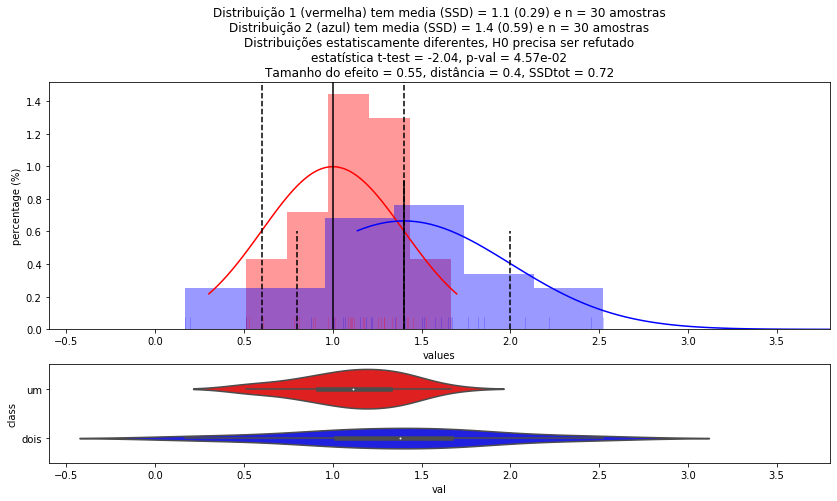

In [41]:
mus = [1, 1.4]
sds = [0.4, 0.6]
xlim = [mus[0]-4*sds[0], mus[1]+4*sds[1]]
N = 30; alpha=0.05

plot_2_distributions(mus, sds, N=N, xlim=xlim, alpha=alpha)